# Lab 12: TensorFlow & Logistic/Softmax Regression

In this lab, we are going to briefly go through a widely used deep learning framework -- Tensorflow and implement
logistic regression with TensorFlow. 

**Install TensorFlow**

- Run the following cell. If running into issues
    - For Mac users, please refer to https://www.tensorflow.org/install/install_mac (install with Anaconda)
    - For Windows users, please refer to https://www.tensorflow.org/install/install_windows


In [1]:
!pip install --user --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.4.0-py3-none-any.whl

    100% |████████████████████████████████| 38.8MB 12kB/s  eta 0:00:01
    100% |████████████████████████████████| 389kB 964kB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 230kB/s ta 0:00:011   58% |██████████████████▉             | 983kB 6.5MB/s eta 0:00:01
    100% |████████████████████████████████| 4.6MB 96kB/s  eta 0:00:01
    100% |████████████████████████████████| 51kB 4.3MB/s eta 0:00:01
  Using cached six-1.11.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 491kB 752kB/s eta 0:00:01
    100% |████████████████████████████████| 890kB 476kB/s eta 0:00:01
    100% |████████████████████████████████| 317kB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 276kB 1.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /Users/katherineeddinger/Library/Caches/pip/wheels/6f/85/6c/56b8e1292c6214c4eb73b9dda50f53e8e977bf65989373c962
  Running setup.py bdist_wheel for markdown ... done
  Stored in direc

In [1]:
# Test your installtion 
import tensorflow as tf
print(tf.__version__)
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

/Users/katherineeddinger/anaconda3/envs/ds100/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


1.4.0
b'Hello, TensorFlow!'


In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('lab12.ok')

Assignment: Lab 12
OK, version v1.13.9



In today's lab, we're going to use logistic regression to classify handwritten digits. You'll learn about logistic / softmax regression and TensorFlow, a popular machine learning library developed by Google.

[TensorFlow](https://www.tensorflow.org/) is a library typically used to train deep neural networks (DNNs).  DNN learning is just like linear regression or classification, except that we search over a more complicated class of functions, not just linear ones.  DNNs have been popularized by their success in many fields, such as in spam detection, speech recognition, or even in art, such as [Neural Style](https://github.com/anishathalye/neural-style).  They are a building block in many successful applications of machine learning in recent years.

Protip: This lab is taken straight from the [TensorFlow tutorials](https://www.tensorflow.org/get_started/mnist/beginners) so if you get stuck, go ahead and reference that page.

## Digitize it

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset is comprised of 60,000 handwritten digits from 0-9 (10 total types).  The data are *greyscale pixels* from scans of handwriting.

Let's load in and take a peek at the data. The next cell will download and load the data into a variable called `mnist`.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Data Statistics
mnist.train.images.shape, mnist.validation.images.shape, mnist.test.images.shape

((55000, 784), (5000, 784), (10000, 784))

Each training example is originally a 28x28 image:

![](https://www.tensorflow.org/images/MNIST-Matrix.png)

To make it easier for machine learning, the images are flattened out into length-784 vectors.

Here's a function to reshape the vector back into a 28x28 image and a function to display one / multiple images.

In [5]:
def example_to_image(example):
    '''Takes in a length-784 training example and returns a (28, 28) image.'''
    return example.reshape((28, 28))

def show_images(images, ncols=2, figsize=(10, 7), **kwargs):
    """
    Shows one or more images.
    
    images: Image or list of images.
    """
    def show_image(image, axis=plt):
        plt.imshow(image, cmap='gray', **kwargs)
        
    if not (isinstance(images, list) or isinstance(images, tuple)):
        images = [images]
    
    nrows = math.ceil(len(images) / ncols)
    ncols = min(len(images), ncols)
    
    plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        axis = plt.subplot2grid(
            (nrows, ncols),
            (i // ncols,  i % ncols),
        )
        axis.tick_params(bottom='off', left='off', top='off', right='off',
                         labelleft='off', labelbottom='off')
        axis.grid(False)
        show_image(image, axis)

---
<br></br>

# Question 1

Use the provided `example_to_image` and `show_images` function to visualize the training examples given below.

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

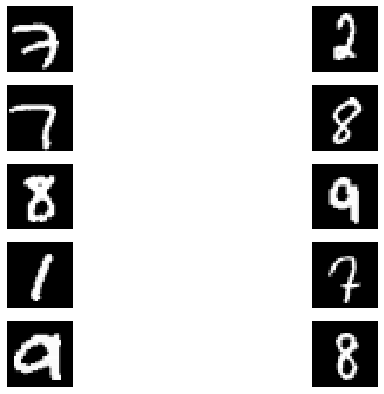

In [6]:
# These indices are the examples you should show from mnist.train.images
examples_to_show = np.array([0,  5100, 10200, 15300, 20400, 25500, 30600, 35700, 40800, 45900])

# Get the examples from the training data
examples = mnist.train.images[examples_to_show]

# Convert each example into an image
images = [example_to_image(example) for example in examples]

# Call show_images using ncols=5
show_images(images) # Hint: `use show_image`

# We'll print the labels for each of these examples
mnist.train.labels[examples_to_show]

In [7]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Saved 'lab12.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: kath.eddinger@berkeley.edu
Successfully logged in as kath.eddinger@berkeley.edu
Backup... 100% complete
Backup successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab12/backups/r098k4
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Notice that there are more than 2 labels (0 through 9), and the label data are represented in a one-hot encoding. So, the labels have dimension n x 10.  This is different from what we've done before, but it is is a typical strategy for *multiclass* classification.  We will see how our *softmax* loss function incorporates 10-dimensional labels.

---
<br></br>
## Softmax Regression

We've discussed logistic regression at length during lecture. The basic idea is that instead of taking the standard regression equation:

$$ f_\theta(x) = \theta_1x_1 + ... + \theta_dx_d + b = \theta^\top x + b $$

We fit the sigmoid function instead:

$$ f_\theta(x) = s(\theta_1x_1 + ... + \theta_dx_d + b) = s(\theta^\top x + b) $$

Where $$ s(x) = \frac{1}{1 + e^{-x}} $$

The output of $s$ is always a number between 0 and 1, so we can roughly say, "This example has a 70% chance of being in class 1 and 30% chance of being in class 2, so we'll label it class 1."

When we have more than one class (say $J$ classes), we instead use the **softmax** function:

$$ \text{softmax}(x)_i = \frac{e ^ {x_i}}{\sum_{j=1}^{J} e^{x_j}} $$

Which basically means: "For an example $x$, give each possible class a score, then make sure all the scores add to 1 so we can say this example has a 50% chance of being a 0, 10% of being a 1, 15% of being a 2, etc."

Then our regression function becomes:

$$ f_\theta(x) = \text{softmax}(\theta^\top x + b) $$

It's important to notice that the output of $f_\theta$ and the input to $\text{softmax}$ are 10-dimensional.  Since we learn a different score for each class, we need a whole row of parameters for each class.  Think about what that says about the dimensions of $\theta$ and $b$.

--- 
<br></br>
## TensorFlow

Let's code this up in TensorFlow. It's easy to implement this after you learn the syntax.

Once you learn the basic syntax, you can create much more complicated models in a similar way. TensorFlow also  allows you to use your computer's GPU (graphical processing unit) to train your model, significantly decreasing training time.

We're not going to doing very complicated things in TensorFlow today. However, we'll point out where it gives us flexibility that `scikit-learn` doesn't.

<br></br>
TensorFlow operates on variables and relationships between them.  Defining, training, and using a model has a few steps:

1. We define variables for every quantity involved in the modeling process.  Some examples: the input to a model, the parameters of the model, any intermediate calculations done by the model, the outputs of the model, and the true labels we want to match.
2. We describe the relationships between those variables; for example, multiplying the parameters by the inputs will produce our scores.
3. We fill in the inputs and true labels, and we tell TensorFlow to use gradient descent to compute the best parameters.
4. We can then fill in new inputs and observe the outputs of the trained model.


<br></br>
**Inputs**

We use `tf.placeholder` to specify an input variable. In our case, we want our training data to be an input to the classifier (eg. training points in -> prediction out).

The syntax is: `tf.placeholder( type , shape )` where `shape` is the shape of the input, like a NumPy array's shape.

For example, `tf.placeholder(tf.int32, [50, 3])` says: "This input takes in an integer array with 50 examples, 3 dimensions each."  Generally we don't hard-code the first dimension, the number of training examples, ourselves.  Instead, we write `tf.placeholder(tf.int32, [None, 3])`, which says: "This input takes in an integer array with any number of examples, 3 dimensions each."

---
<br></br>

# Question 2

Create a placeholder called `x` that takes in a `tf.float32` array with any number of examples from the `mnist` dataset.

Then, create a placeholder called `y_` that takes in a `tf.float32` array with any number of corresponding labels from the `mnist` dataset.

In [ ]:
x = ...
y_ = ...

---
<br></br>

# Question 3

Weight and bias vectors are not determined by external input, but will be constantly updated while the gradient descent training process runs. The syntax to create such variables (initializing them to 0) is:

`tf.Variable(tf.zeros( shape ))` where `shape` is the shape of the variable, again in NumPy style.

Create variables `theta` and `b` corresponding to the weights and bias of our classifier.

Remember that our prediction is a length 10 vector, *not* a single value as we have done before. This means that
the dimensions of `theta` are *not* `(784, 1)` as usual. Think carefully about the dimensions of `x`, `theta`, `b`, and our prediction.


In [ ]:
theta = ...
b = ...

---
<br></br>

# Question 4

Now, we can implement our classifier.

The `tf.nn.softmax(...)` function provides a softmax implementation for us. Instead of using the typical `X @ theta`, we use `tf.matmul(...)`.  Addition via `+` works as normal.

Set `y` to the output of the softmax regression function.

In [ ]:
y = ...

<br></br>
## Loss Function 

`y` is a variable now.  Its value will be determined by the inputs `x` and parameters `theta` and `b`.

We can implement all sorts of classifiers just by changing parts of the equation above. You just have to know the functional form of the classification function.

In order to train our classifier, we need to implement the correct loss function. In class, we saw that the loss function for logistic regression was the negative log probability assigned by the model to the true labels. This translates directly to softmax regression. When there are multiple classes, it is called the *cross-entropy loss*:

$$ L_{y}(\hat{y}) = - \sum_{j=1}^{J} y_j \log \hat{y}_j $$

where $ y $ is the one-hot vector of the label and $ \hat{y} $ is the vector of predicted softmax values.

Verify that if we assign probability 1 to the correct label and 0 to the others, then the loss is 0.  It's also useful to verify that if the prediction is incorrect, the loss is greater than 0.

Here's the cross entropy loss in TensorFlow:

In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

<br></br>
We'll call `cross_entropy` the loss function, but as a Python object it's just another TensorFlow variable.  Its value is a scalar, the number we'd like to minimize by choosing `theta` and `b`.

*Note:* Ordinarily you wouldn't have to write out the last two steps; TensorFlow provides [a single function](https://www.tensorflow.org/versions/r0.10/api_docs/python/nn/classification#softmax_cross_entropy_with_logits) that produces the cross-entropy loss given just $\theta^T x + b$.

---
<br></br>

# Question 5 

Now that we have written down our classification pipeline and loss, we need to tell TensorFlow how to run gradient descent.

The syntax for this is:

    tf.train.GradientDescentOptimizer( learning_rate ).minimize( loss_fn )

Here `learning_rate` is the size of the steps we take at each iteration of gradient descent, and `loss_fn` is the variable defining the loss we'd like to minimize.

Set `train_step` to the gradient descent rule using `0.5` as the learning rate and the cross entropy loss function.

In [ ]:
train_step = ...

---
<br></br>

## Train it!
Our variables were containers or placeholders for data, with no numbers yet.  Similarly, `train_step` is a just a *recipe* for optimizing, embodied in a Python object.  We didn't actually do any optimization yet.  But we're ready now.

The next cell tells TensorFlow to repeatedly compute `train_step`, filling in batches of 100 images at a time for `x` and `y_`.  This will update `theta` and `b` using stochastic gradient descent for 1000 iterations, using 100 examples per iteration.

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

<br></br>

## How did we do?

Run the next cell to see how your classifier did on the test set.

In [ ]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy:")
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Not bad! Let's see some examples of your predictions:

In [ ]:
EXAMPLES_TO_SHOW = 10

corrects = sess.run(correct_prediction, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
correct_i = np.where(corrects)[0][:EXAMPLES_TO_SHOW]

print("Correct predictions:")
correct_ex = mnist.test.images[correct_i]
correct_images = [example_to_image(example) for example in correct_ex]
show_images(correct_images, 5)

In [ ]:
incorrect_i = np.where(~corrects)[0][:EXAMPLES_TO_SHOW]
print("Incorrect predictions:")
incorrect_ex = mnist.test.images[incorrect_i]
incorrect_images = [example_to_image(example) for example in incorrect_ex]
show_images(incorrect_images, 5)

print("You predicted:")
print(sess.run(tf.argmax(y,1), feed_dict={x: mnist.test.images, y_: mnist.test.labels})[incorrect_i])

<br></br>

Chances are some of your incorrect predictions are hard for you to guess, too!

We have only scratched the surface of TensorFlow.  If you'd like to continue, you can start at the [online tutorials](https://www.tensorflow.org/versions/r0.10/tutorials/).

## Submission

Run the cell below to run all the OkPy tests at once:

In [9]:
import os
print("Running all tests...")
_ = ok.grade_all()

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [8]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab12.ipynb'.
Submit... 100% complete
Submission successful for user: kath.eddinger@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab12/submissions/y8Xo8P
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit

